In [16]:
import matplotlib.pyplot as plt
import numpy as np
import numpy.random as rand
import scipy.optimize

In [2]:
def mandelbrot(xmin, xmax, ymin, ymax, xiter, yiter, limit):
    a_step = 0

    pixel_list = np.ndarray((xiter + 2, yiter + 2))

    for a in np.linspace(xmin, xmax, xiter):
        a_step += 1
        b_step = 0
        for b in np.linspace(ymin, ymax, yiter):
            b_step += 1
            z_0 = complex(a, b)
            z = z_0
            counter = 0

            while abs(z) < 2 and counter < limit:
                z = z ** 2 + z_0
                counter += 1
                
            pixel_list[b_step][a_step] = counter
    

    return pixel_list



In [3]:
%matplotlib widget
def plot_maker():
    
    a_step = -1
    b_step = -1
    xmin = -2
    xmax = 0.5
    ymin = -2
    ymax = 2
    xiter = 600
    yiter = 600
    limit = 250

    pixel_list = np.zeros((xiter+1, yiter+1))

    for a in np.linspace(xmin, xmax, xiter):
        a_step += 1
        b_step = 0
        for b in np.linspace(ymin, ymax, yiter):
            b_step += 1
            z_0 = complex(a, b)
            z = z_0
            counter = 0

            while abs(z) < 2 and counter < 250:
                z = z ** 2 + z_0
                counter += 1
                
            pixel_list[b_step][a_step] = counter

    nticks = 5
    plt.title("Mandelbrot set")
    plt.xticks(ticks=np.linspace(0, xiter, nticks), labels=np.linspace(xmin, xmax, nticks))
    plt.yticks(ticks=np.linspace(0, yiter, nticks), labels=np.linspace(ymin, ymax, nticks))

    plt.imshow(pixel_list, cmap='RdBu')
    plt.show()

plot_maker()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [4]:
xmin = -2
xmax = 0.5
ymin = -2
ymax = 2
xiter = 2000
yiter = 2000
limit = 250

pixel_list = mandelbrot(xmin, xmax, ymin, ymax, xiter, yiter, limit)


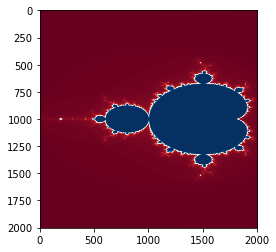

In [10]:
%matplotlib inline
plt.imshow(pixel_list, cmap='RdBu')
plt.show()


In [35]:
EXPECTED_AREA = 1.506484

In [5]:
def check_converge(z_0, treshold=2, max_iterations=25):
    """
    Checks if the complex number z_0 converges within the max_iterations.
    """

    z = z_0
    counter = 0
    while True:
        z = z ** 2 + z_0
        counter += 1

        if abs(z) > 2:
            return False
        if counter > max_iterations:
            return True

def determine_area(i = 25, s=10000, sample_method="pure"):
    """
    Determine the area of the mandelbrot set.

    Parameters:
    i: int, Max number of iterations
    s: int, The number of sample points.
    sample_method: string, options are:
        'pure': pure random sampling,
        'hypercube': hypercube sampling,
        'orthogonal': orthogonal sampling
    """

    xmin = -2
    xmax = 1
    ymin = -2
    ymax = 2
    bounding_box_area = (xmax - xmin) * (ymax - ymin)

    if sample_method == "pure":
        Z = generate_sample_points_pure_random(s, xmin=xmin, xmax=xmax, ymin=ymin, ymax=ymax)
    elif sample_method == "hypercube":
        Z = generate_sample_points_hypercube(s, xmin=xmin, xmax=xmax, ymin=ymin, ymax=ymax)
    elif sample_method == "orthogonal":
        Z = generate_sample_points_orthogonal(s, xmin=xmin, xmax=xmax, ymin=ymin, ymax=ymax)

    Z0 = Z

    N = np.zeros(s)

    for _ in range(i):
        Z = np.where(abs(Z) < 2, Z ** 2 + Z0, 100)

    N[Z != 100] = 1

    n_good_points = sum(N)
    
    return bounding_box_area * (n_good_points / s)

def plot_i_s_contour(i_list, s_list, log=False):
    """
    Plots the difference between the expected and calculated area for different values for i and s. 
    i is the maximum number of iterations and s is the number of samples. 
    """

    total_evaluations = len(i_list) * len(s_list)
    n_evaluations = 0

    data = []
    for i in i_list:

        results = []
        for s in s_list:
            results.append(determine_area(i=i, s=s) - EXPECTED_AREA)
            n_evaluations += 1

            if log and n_evaluations % 10 == 0:
                print(f"Progress: {n_evaluations/total_evaluations * 100:0f}%", end="\r")
        
        data.append(results)

    contour = plt.contourf(s_list, i_list, data, 10, cmap="PuBuGn_r")
    
    colorbar = plt.colorbar(contour)
    colorbar.set_label("Difference between expected area")

    plt.xlabel("Samples")
    plt.ylabel("Max iterations")

    plt.xscale("log")
    plt.yscale("log")
    plt.show()

def plot_i_s_variance(i_list, s_list, nruns=10, log=False):
    """
    Plots the variance of the difference between the expected and calculated area for different values for i and s. 
    i is the maximum number of iterations and s is the number of samples. 
    """
    
    total_evaluations = len(i_list) * len(s_list) * nruns
    n_evaluations = 0

    data = []
    for i in i_list:

        results = []
        for s in s_list:

            run_results = []
            for run in range(nruns):
                run_results.append(determine_area(i=i, s=s))
                n_evaluations += 1

                if log and n_evaluations % 10 == 0:
                    print(f"Progress: {n_evaluations/total_evaluations * 100:1f}%", end="\r")

            results.append(np.var(run_results))
        
        data.append(results)

    contour = plt.contourf(s_list, i_list, data, 10, cmap="PuBuGn_r")
    
    colorbar = plt.colorbar(contour)
    colorbar.set_label("Variance in area")

    plt.xlabel("Samples")
    plt.ylabel("Max iterations")

    plt.xscale("log")
    plt.yscale("log")
    plt.show()

def generate_sample_points_pure_random(s=10000, xmin=-2, xmax=1, ymin=-2, ymax=2):
    
    X = rand.rand(s) * (xmax - xmin) + xmin
    Y = rand.rand(s) * (ymax - ymin) + ymin

    return X + Y * 1j

def generate_sample_points_hypercube(s=10000, xmin=-2, xmax=1, ymin=-2, ymax=2):
    # TODO

    pass

def generate_sample_points_orthogonal(s=10000, xmin=-2, xmax=1, ymin=-2, ymax=2):
    # TODO

    pass

def plot_j_dependance(i = 25, s=10000, sample_method="pure"):

    expected_area = determine_area(i=i, s=s)

    area_differences = []
    js = []
    for j in range(1, i):
        js.append(j)
        area_differences.append(determine_area(i=j, s=s, sample_method=sample_method) - expected_area)

    plt.plot(js, area_differences)
    plt.ylabel("Area difference")
    plt.xlabel("j")
    plt.show()


def calc_error(i, s):

    return determine_area(i, s) - EXPECTED_AREA

def get_s_with_comparable_error(i):
    """
    Gets a s value, which has comparable error as the error in i.
    """

    i_error = calc_error(i, 1000000)

    s_min, s_max = find_s_range(i_error)

    return find_s(i_error, s_min, s_max)

def find_s_range(i_error, s_guess=1000):
    """
    Find a broad range at where the s error is comparable with the i error.

    Returns:
        s_min: lowerbound
        s_max: upperbound
    """

    initial_error = determine_area(100000)




In [ ]:
%matplotlib inline

i_list = np.logspace(0, 3, 3, dtype=int)
s_list = np.logspace(1, 5, 3, dtype=int)
plot_i_s_contour(i_list, s_list, log=True)
plot_i_s_variance(i_list, s_list, nruns=3, log=True)

In [47]:
# Calc i error
for i in [1, 10, 100, 1000, 10000, 100000]:
    print(f"{i}: {calc_error(i, 1000000):e}")


1: 8.593772e+00
10: 5.149160e-01
100: 4.184000e-02


In [41]:
# Calc s error
for s in [1, 10, 100, 1000, 10000, 100000]:

    errors = []
    for _ in range(100):
        errors.append(abs(calc_error(1000, s)) - 0.0042440000000001366)

    print(f"{s}: {sum(errors) / len(errors):e}")

1: 2.400943e+00
10: 1.011442e+00
100: 2.949779e-01
1000: 1.028386e-01
10000: 2.946552e-02
100000: 6.576960e-03


### i error

|i     |error                |
|------|---------------------|
|1     |8.598812000000002e0  |
|10    |5.164399999999998e-1 |
|100   |3.481999999999963e-2 |
|1000  |4.2440000000001366e-3|
|10000 |5.24000000000191e-4  |

These errors were computed with s=1000000. It is assumed that these are enough samples that the error over s is negligible

### s error

|s     |error       |
|------|------------|
|1     |2.400943e+0 |
|10    |1.011442e+0 |
|100   |2.949779e-1 |
|1000  |1.028386e-1 |
|10000 |2.946552e-2 |
|100000|6.576960e-3 |

These errors were computed with i=1000. The error over i is substracted from these results.

[ 8.59879742 -1.22101737]


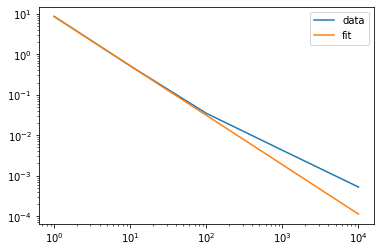

[ 2.4174612  -0.41232286]


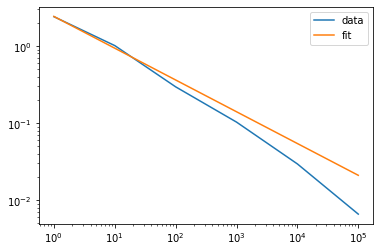

In [46]:
%matplotlib inline

i_values = [1, 10, 100, 1000, 10000]
i_errors = [8.598812000000002e0, 5.164399999999998e-1, 3.481999999999963e-2, 4.2440000000001366e-3, 5.24000000000191e-4]

s_values = [1, 10, 100, 1000, 10000, 100000]
s_errors = [2.400943e+0, 1.011442e+0, 2.949779e-1, 1.028386e-1, 2.946552e-2, 6.576960e-3]


def fit_linear(x, a=1, b=1):
    return a + b * x
    
def fit_log(x, a = 1, k = 1):

    return a * x ** k

def calc_i_error_fit():
    
    popt, pcov = scipy.optimize.curve_fit(fit_log, i_values, i_errors, p0=[1, -1])
    print(popt)
    return popt[0], popt[1]

def calc_s_error_fit():
    popt, pcov = scipy.optimize.curve_fit(fit_log, s_values, s_errors, p0=[1, -1])
    print(popt)
    return popt[0], popt[1]

def plot_i_error():

    a, k = calc_i_error_fit()

    y_fit_values = [fit_log(value, a=a, k=k) for value in i_values]
    
    plt.plot(i_values, i_errors, label="data")

    plt.plot(i_values, y_fit_values, label="fit")

    plt.xscale("log")
    plt.yscale("log")

    plt.legend()
    plt.show()

def plot_s_error():
    
    a, k = calc_s_error_fit()

    y_fit_values = [fit_log(value, a=a, k=k) for value in s_values]
    
    plt.plot(s_values, s_errors, label="data")

    plt.plot(s_values, y_fit_values, label="fit")

    plt.xscale("log")
    plt.yscale("log")

    plt.legend()
    plt.show()

plot_i_error()
plot_s_error()